In [1]:
import numpy as np
import pickle
from skimage import filters
from PIL import Image
import glob as glob
import matplotlib.pyplot as plt
import torch as torch

In [2]:
testimage = [np.array(Image.open(path)) for path in glob.glob("test_imgs/*.jpg")]
testlabel = [np.array(Image.open(path)) for path in glob.glob("test_imgs/*.png")]

In [5]:
def reg_blur(label = None, threshold = 0.25):
    if label is None: return 1
    if type(label) is not np.ndarray: return 1
    blur = filters.gaussian(label,10,multichannel=True)
    print(np.amax(blur))
    return np.where(np.divide(blur,np.amax(blur))>threshold,1,0)

In [152]:
def noisy_blur(label = None, threshold = 0.25, noise = .25, noise_kernels = 10):
    if label is None: return 1
    if type(label) is not np.ndarray: return 1
    blur = filters.gaussian(label,10,multichannel=True)
    noisetensor = torch.normal(0,1,size=(1,1,noise_kernels,noise_kernels))
    noisetensor = torch.nn.functional.interpolate(noisetensor, size = (len(blur[0]),len(blur[1])), mode = 'bilinear')
    noisetensor = np.array(noisetensor.permute(2,3,1,0)[:,:,:,0])
    noisetensor = np.divide(noisetensor,np.amax(np.array(noisetensor)))*np.amax(blur)*noise
    blur = blur+noisetensor
    return np.where(np.divide(blur,np.amax(blur))>threshold,1,0)

0.0033054815950608173


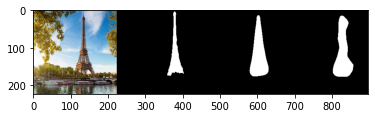

0.003561674289555073


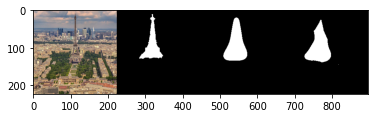

0.0020697942376571685


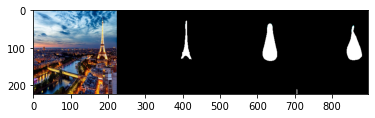

0.002327025233665738


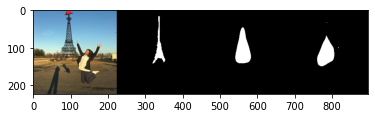

0.003574287136520723


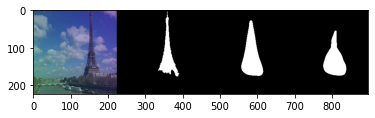

In [153]:
for i in range(len(testimage)):
    quouble = np.hstack((testimage[i], testlabel[i]*255, reg_blur(testlabel[i])*255, noisy_blur(testlabel[i])*255))
    plt.imshow(quouble)
    plt.show()
